### Employee-Turnover-Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sklearn
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv(r"C:/Users/Yash/Downloads/Employee.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
df=df.rename(columns = {'sales':'department'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
set(df['department'])

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [6]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])
df['department']=np.where(df['department'] =='IT', 'technical', df['department'])

In [8]:
df['department']

0            sales
1            sales
2            sales
3            sales
4            sales
           ...    
14994    technical
14995    technical
14996    technical
14997    technical
14998    technical
Name: department, Length: 14999, dtype: object

In [9]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [11]:
LE = LabelEncoder()

In [12]:
LE.fit(df['department'])
df['department'] = LE.transform(df['department'])

In [13]:
df['department']

0        6
1        6
2        6
3        6
4        6
        ..
14994    7
14995    7
14996    7
14997    7
14998    7
Name: department, Length: 14999, dtype: int32

In [14]:
LE.fit(df['salary'])
df['salary'] = LE.transform(df['salary'])
df['salary']

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32

In [15]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,6,1
1,0.80,0.86,5,262,6,0,1,0,6,2
2,0.11,0.88,7,272,4,0,1,0,6,2
3,0.72,0.87,5,223,5,0,1,0,6,1
4,0.37,0.52,2,159,3,0,1,0,6,1


In [16]:
x=df.drop(['left'],axis=1)
y = ['left']
y

['left']

In [17]:
LR = LogisticRegression(max_iter=2000)

In [18]:
df_train, df_test = train_test_split(df, test_size = 0.2)

In [19]:
x_train = df_train.drop(['left'],axis = 1)
x_test = df_test.drop(['left'],axis = 1)

In [20]:
y_train = df_train['left']
y_test = df_test['left']

In [21]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [22]:
print('Accuracy of the model using Logistic Regression is: {:.3f}'.format(accuracy_score(y_test, LR.predict(x_test)))) #Accuracy score

Accuracy of the model using Logistic Regression is: 0.769


In [23]:
print(classification_report(y_test, LR.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2288
           1       0.53      0.25      0.34       712

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000



Text(0.5, 1.0, 'Logistic Regression')

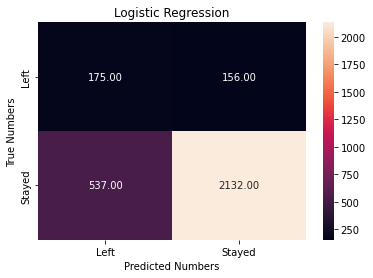

In [24]:
lr_y_pred = LR.predict(x_test)
lr_cm = metrics.confusion_matrix(lr_y_pred, y_test, [1,0])
sns.heatmap(lr_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True Numbers')
plt.xlabel('Predicted Numbers')
plt.title('Logistic Regression')

## Using Random Forest

In [25]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [26]:
print('Accuracy of the model using Random Forest : {:.3f}'.format(accuracy_score(y_test, rfc.predict(x_test))))

Accuracy of the model using Random Forest : 0.992


In [27]:
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2288
           1       1.00      0.97      0.98       712

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [28]:
y_pred=rfc.predict(x_test)

In [29]:
cm = metrics.confusion_matrix(y_pred, y_test, [1,0])

Text(0.5, 1.0, 'Random Forest')

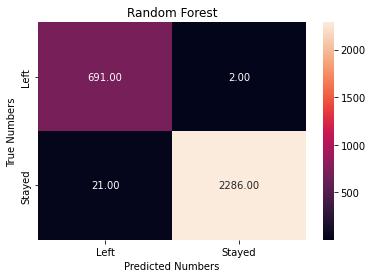

In [30]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True Numbers')
plt.xlabel('Predicted Numbers')
plt.title('Random Forest')

In [31]:
lr_roc_auc = roc_auc_score(y_test, LR.predict(x_test)) #roc curve using logistic regression
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

In [32]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.00917832, 0.00917832, 0.00961538,
        0.00961538, 0.01005245, 0.01005245, 0.01048951, 0.01048951,
        0.0118007 , 0.0118007 , 0.01267483, 0.01267483, 0.01354895,
        0.01354895, 0.01398601, 0.01398601, 0.01398601, 0.01442308,
        0.01442308, 0.01486014, 0.01486014, 0.0152972 , 0.0152972 ,
        0.01617133, 0.01617133, 0.01704545, 0.01704545, 0.01835664,
        0.01835664, 0.01879371, 0.01879371, 0.01879371, 0.01879371,
        0.01966783, 0.01966783, 0.0201049 , 0.0201049 , 0.0201049 ,
        0.02097902, 0.02097902, 0.02141608, 0.02141608, 0.02141608,
        0.02185315, 0.02185315, 0.02185315, 0.02185315, 0.02185315,
        0.02185315, 0.02229021, 0.02229021, 0.02272727, 0.02272727,
        0.02316434, 0.02316434, 0.0236014 , 0.0236014 , 0.0236014 ,
        0.0236014 , 0.02447552, 0.02447552, 0.02491259, 0.02491259,
        0.02534965, 0.02534965, 0.02578671, 0.02578671, 0.02666084,
        0.02666084, 0.02666084, 0.02753497, 0.02

In [33]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))#roc curve using random forest
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

In [34]:
rfc_fpr, rfc_tpr, rfc_thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.37062937e-04,
        4.37062937e-04, 4.37062937e-04, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 1.74825175e-03, 2.62237762e-03,
        3.49650350e-03, 4.80769231e-03, 6.11888112e-03, 6.55594406e-03,
        7.43006993e-03, 7.86713287e-03, 1.44230769e-02, 1.74825175e-02,
        1.79195804e-02, 1.96678322e-02, 2.31643357e-02, 2.57867133e-02,
        3.45279720e-02, 3.88986014e-02, 5.11363636e-02, 5.72552448e-02,
        6.68706294e-02, 8.08566434e-02, 9.92132867e-02, 1.12762238e-01,
        1.34178322e-01, 1.73951049e-01, 2.21590909e-01, 3.05944056e-01,
        4.51486014e-01, 1.00000000e+00]),
 array([0.        , 0.

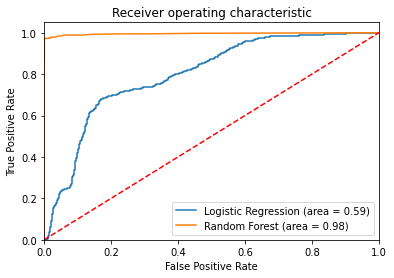

In [35]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
rfc.feature_importances_

array([0.35006498, 0.11881249, 0.17453032, 0.14198206, 0.18903103,
       0.00608221, 0.0010003 , 0.00992789, 0.00856873])

In [37]:
df1=pd.DataFrame({'Features': x_train.columns, 'Feature_importance_Score': rfc.feature_importances_}).sort_values(by = ['Feature_importance_Score'],ascending = False,ignore_index  = True)
df1.head(10)

,Features,Feature_importance_Score
0,satisfaction_level,0.350065
1,time_spend_company,0.189031
2,number_project,0.174530
3,average_montly_hours,0.141982
4,last_evaluation,0.118812
5,department,0.009928
6,salary,0.008569
7,Work_accident,0.006082
8,promotion_last_5years,0.001000


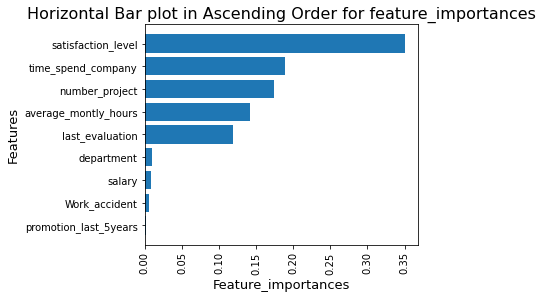

In [38]:
fig,ax = plt.subplots()
plt.barh('Features', 'Feature_importance_Score',data=df1)
plt.xlabel("Feature_importances", size=13)
plt.ylabel("Features", size=13)
plt.xticks(rotation=90)
ax.invert_yaxis()
fig.tight_layout()
plt.title("Horizontal Bar plot in Ascending Order for feature_importances", size=16)
plt.show()

### As we can see from the above data and bar chart that "satisfaction_level","time_spend_company" and "number_project" are the most impotant features while predicting our target variable "left"
